### Using this kernel, I've achieved accuracy 98.5% (0.9850).

#### Import Essential Library

In [51]:
import keras
from keras.utils import to_categorical                # Convert categorical (y_train)
from keras.models import Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pandas as pd                                  # Load dataset (train.csv, test.csv)
import numpy as np                                   # Resize image
from PIL import Image

#### Load ( train.csv and test.csv ) and Convert into NumPy Array

In [52]:
train = pd.read_csv('../input/train.csv', header=None, skiprows=1).iloc[:,:].values
test = pd.read_csv('../input/test.csv', header=None, skiprows=1).iloc[:,:].values

#### Spliting into x_train, y_train, x_test

In [55]:
# For Training
x_train = train[:,1:]
y_train = train[:,0]

# For Testing
x_test  = test[:,:]

#### Resize Image

In [57]:
# The total features are 784. We can convert into image format which shape must be (28*28*1).

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)   # x_train.shape[0] = 42,000
x_test  = x_test.reshape(x_test.shape[0],   28, 28, 1)   # x_test.shape[0]  = 28,000

#### y_train Convert into Categorical

In [58]:
y_train = to_categorical(y_train, num_classes=10) # There is 10 distinct number (0, 1, 2, ..., 9)

#### Essential Parameter

In [60]:
batch_size = 128
nClass = 10
epochs = 5         # use epochs=30 for this dataset.

#### Build Model

In [61]:
def getModel(batch_size, nClass, epochs):
    # Shape 28*28*1 = 784
    
    inputs = Input(shape=(28,28,1))
    x = Conv2D(filters=32, kernel_size=(3, 3))(inputs)
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(nClass, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    return model

In [62]:
# Calling getModel(...)
model = getModel(batch_size, nClass, epochs)

> #### Model Summary ( Optional )

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1179776   
__________

#### Print Model ( Optional )

In [74]:
def printModel(model):
    from keras.utils import plot_model
    plot_model(model, show_shapes=True, to_file='model.png')
    
    return Image.open('model.png')
    ### --- Done --- ###

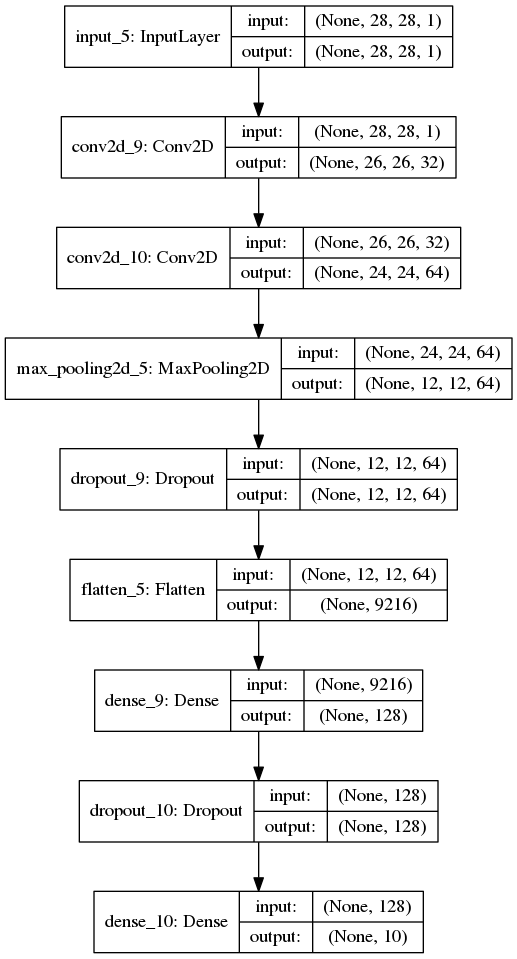

In [75]:
# Calling printModel( )
image = printModel(model)
image

* > #### Train/Fit  the  Model ( epoch > 20 ) [ But I've used epochs=5 to save training time. ]

In [76]:
history = model.fit(x=x_train, y=y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
)

Epoch 1/5
42000/42000 [==============================] - 125s 3ms/step - loss: 2.8288 - acc: 0.7589
Epoch 2/5
42000/42000 [==============================] - 123s 3ms/step - loss: 0.1799 - acc: 0.9499
Epoch 3/5
42000/42000 [==============================] - 124s 3ms/step - loss: 0.1349 - acc: 0.9622
Epoch 4/5
42000/42000 [==============================] - 110s 3ms/step - loss: 0.1089 - acc: 0.9691
Epoch 5/5
42000/42000 [==============================] - 118s 3ms/step - loss: 0.0958 - acc: 0.9736


#### Graph ( Optional )

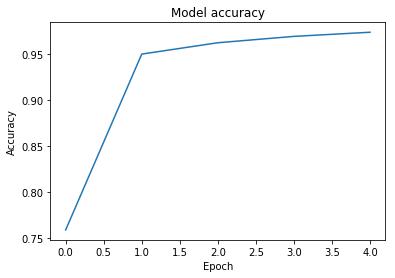

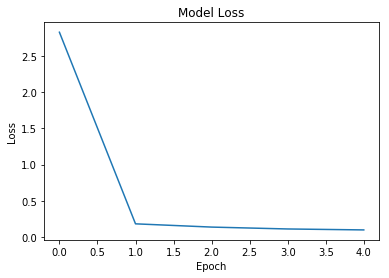

In [77]:
# plotting the metrics
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


#### Note: Graphs clearly show that if we increase the number of the epoch, then the loss will decrease, and the accuracy will improve.

#### Predict Model Uing x_test

In [78]:
y_predict = model.predict(x_test, verbose=1)

28000/28000 [==============================] - 30s 1ms/step


In [79]:
y_predict

array([[  9.43211871e-13,   2.76544629e-12,   1.00000000e+00, ...,
          5.83021909e-10,   6.90981994e-11,   3.77657134e-13],
       [  1.00000000e+00,   1.34253580e-10,   6.96863189e-09, ...,
          3.76664047e-11,   5.07555609e-10,   8.68081856e-11],
       [  7.28063578e-14,   2.39258231e-11,   7.38439032e-11, ...,
          9.14201936e-10,   1.46482193e-09,   9.99999523e-01],
       ..., 
       [  4.53605926e-22,   9.57401171e-15,   1.31040632e-13, ...,
          2.99632349e-14,   8.98202038e-15,   2.98464044e-15],
       [  1.88299140e-10,   1.46922530e-09,   8.17674817e-11, ...,
          1.16916942e-06,   3.51243545e-09,   9.99951243e-01],
       [  2.39171764e-14,   9.92814927e-11,   1.00000000e+00, ...,
          8.19973117e-11,   1.36321798e-09,   1.36208276e-12]], dtype=float32)

In [80]:
y_predict.shape

(28000, 10)

#### Convert 2D into 1D, and picked the label

In [81]:
y_predict = np.argmax(y_predict, axis=1)

In [82]:
y_predict

array([2, 0, 9, ..., 3, 9, 2])

#### Prepared for Submission

In [83]:
with open('submission.csv', 'w') as F:
    F.write('ImageId,Label\n')
    for num, i in enumerate(y_predict):
        F.write('{},{}\n'.format(num+1, i))

#### References
- [ Ahmed Imtiaz ] https://www.kaggle.com/imtiazprio/transfer-learning-and-xgboost
- [ Yassine Ghouzam ] https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
- [ DanB ] https://www.kaggle.com/dansbecker/finding-your-files-in-kaggle-kernels